In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import copy
plt.style.use('seaborn-dark')
pd.options.mode.chained_assignment = None

In [2]:
"""Importing the datasets of France's:
- POPULATION
- UNEMPLOYMENT
- POVERTY
- IMMIGRATION
- EDUCATION"""
df_population=pd.read_excel('population.xlsx', sheet_name=None)
df_chomage=pd.read_excel('chomage.xls', sheet_name=None)
df_poverty=pd.read_excel('poverty.xlsx', sheet_name=None)
df_immigration=pd.read_excel('immigration.xlsx', sheet_name=None)
df_baccalaureat=pd.read_excel('bacc.xlsx', sheet_name=None)

In [3]:
"""Only selecting the departmental data, don't care about regional
Including the Frace metro as a dep, but not the provincial one since many don't exist
Taking away the Mayotte departement because the data is all NaN
Departments numbers go from 0 to 101, including france metro"""

df_pop=df_population['DEP']
df_cho=df_chomage['DEP']
df_pov=df_poverty['DEP']
df_imm=df_immigration['DEP']
df_bacc=df_baccalaureat['DEP']

 # Population

In [4]:
"""POPULATION: years, 2021, 2018, 2013, 2008, 1999"""

df_pop_clean=df_pop[3:99]     #eliminating meaningless rows and columns and 
df_pop_clean.reset_index(drop=True, inplace=True)
df_pop_clean.columns=['Dep_number', 'Dep_name', '2021', 'percentage in France','2018', '2013', '2008', '1999']
print(len(df_pop_clean))
df_pop_clean.tail()

df_pop_csv = df_pop_clean[['Dep_number', 'Dep_name', '2018']]
df_pop_csv.columns=['Dep_number', 'Dep_name','population']
df_pop_csv['population_centered'] = df_pop_csv['population'] - df_pop_csv['population'].mean()
df_pop_csv.head()

df_pop_csv.to_csv("population.csv", index=False)

96


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

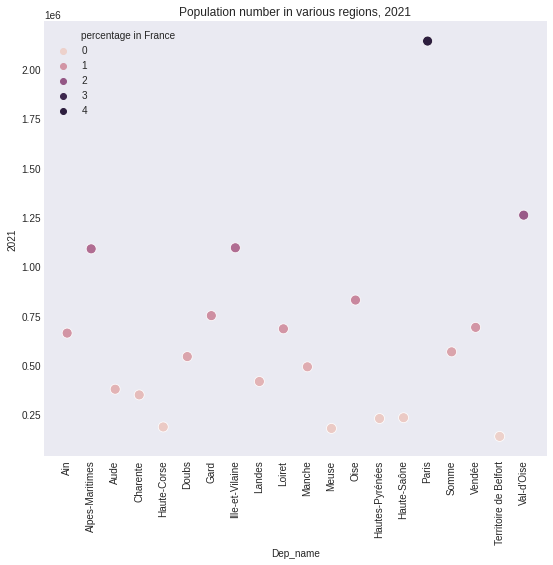

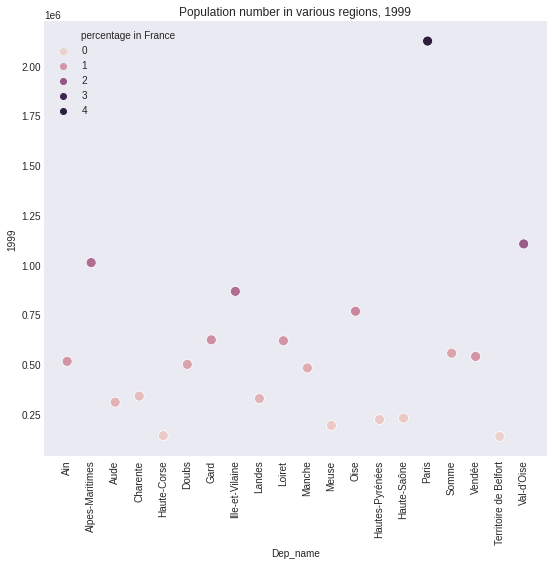

In [5]:
fig, ax = plt.subplots(figsize=(9,8))
sns.despine(left=True, bottom=True)
sns.scatterplot(data=df_pop_clean[::5], x='Dep_name', y="2021", hue='percentage in France', s=100)
plt.title('Population number in various regions, 2021')
plt.xticks(rotation=90)
# sns.displot(data=df_pop[::20], x="2018", kde=True)

f, ax = plt.subplots(figsize=(9,8))
# sns.set(style="white", palette="bright", color_codes=True)
sns.despine(left=True, bottom=True)
sns.scatterplot(data=df_pop_clean[::5], x='Dep_name', y="1999", hue='percentage in France', s=100)
plt.title('Population number in various regions, 1999')
plt.xticks(rotation=90)

 # Unemployement

In [6]:
"""UNEMPLOYMENT tax in 2019"""

df_cho=df_cho[3:105]
df_cho=df_cho.drop([99])  #dropping the province, keeping metro
df_cho.reset_index(drop=True, inplace=True)
df_cho.columns=['Dep_number', 'Dep_name', 'All', 'M','F', '15-24 y', '25-49 y', '50+ y']
print(len(df_cho))
df_cho.tail()

101


,Dep_number,Dep_name,All,M,F,15-24 y,25-49 y,50+ y
96,M,France métropolitaine,8.2,8.2,8.1,19,7.5,6.1
97,971,Guadeloupe,20.5,18.6,22.2,52.7,20.8,14.5
98,972,Martinique,14.9,17.1,12.9,48,16.2,8.2
99,973,Guyane,19.9,19.8,20,39.6,19.8,12.3
100,974,La Réunion,21.3,21,21.7,45.9,19.9,15.7


Text(0, 0.5, 'Departement')

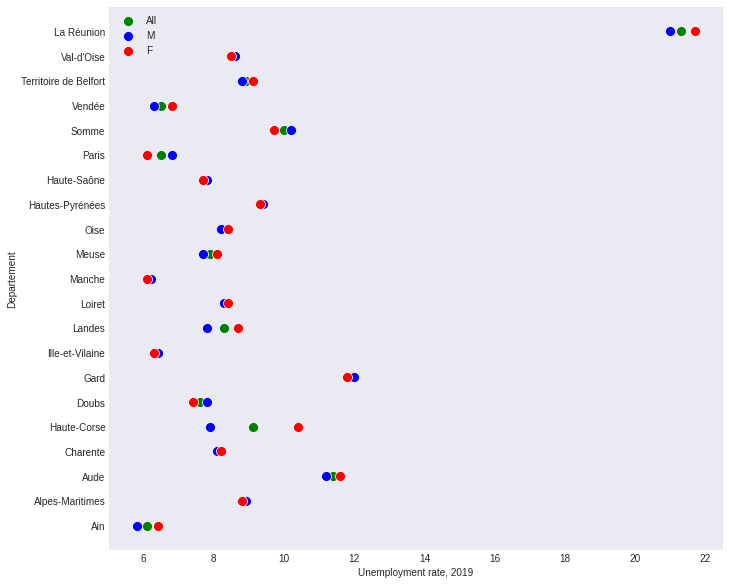

In [7]:
fig, ax = plt.subplots(figsize=(11,10))
sns.despine(left=True, bottom=True)
sns.scatterplot(data=df_cho[::5],x="All", y="Dep_name" , color='green', label='All', s=100)

sns.scatterplot(data=df_cho[::5],x="M", y="Dep_name", color='b' , label='M', s=100)
sns.scatterplot(data=df_cho[::5],x="F", y="Dep_name", color='r', label='F' , s=100)
plt.xlabel("Unemployment rate, 2019")
plt.ylabel("Departement")

 # Poverty

In [8]:
"""POVERTY rate in 2018"""

df_pov_clean=df_pov[3:99]
df_pov_clean.reset_index(drop=True, inplace=True)
df_pov_clean.columns=['Dep_number', 'Dep_name', 'All', '-30 y','30-39 y', '40-49 y', '50-59 y', '60-74 y', '75+ y']
print(len(df_pov_clean))
df_pov_clean.head()

df_pov_csv = df_pov_clean[['Dep_number', 'Dep_name', 'All']]
df_pov_csv['poverty_centered'] = df_pov_csv['All'] - df_pov_csv['All'].mean() 

df_pov_csv.to_csv("poverty.csv", index=False)
df_pov_csv

96


,Dep_number,Dep_name,All,poverty_centered
0,01,Ain,10.3,-4.22917
1,02,Aisne,18.4,3.87083
2,03,Allier,15.5,0.970833
3,04,Alpes-de-Haute-Provence,16.8,2.27083
4,05,Hautes-Alpes,13.9,-0.629167
...,...,...,...,...
91,91,Essonne,13.1,-1.42917
92,92,Hauts-de-Seine,11.9,-2.62917
93,93,Seine-Saint-Denis,28.4,13.8708
94,94,Val-de-Marne,16.6,2.07083


Text(0, 0.5, 'Departement')

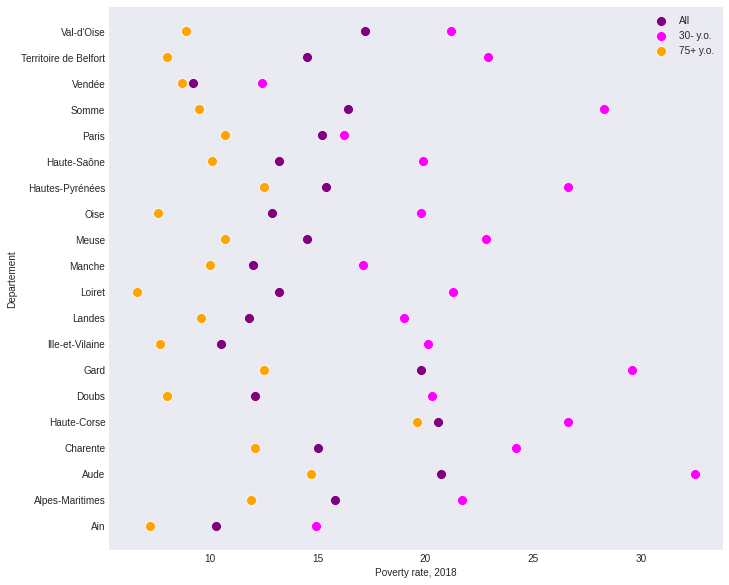

In [9]:
fig, ax = plt.subplots(figsize=(11,10))
sns.despine(left=True, bottom=True)
sns.scatterplot(data=df_pov_clean[::5],x="All", y="Dep_name" , color='purple', label='All', s=100)

sns.scatterplot(data=df_pov_clean[::5],x="-30 y", y="Dep_name", color='magenta' , label='30- y.o.', s=100)
sns.scatterplot(data=df_pov_clean[::5],x="75+ y", y="Dep_name", color='orange', label='75+ y.o.' , s=100)
plt.xlabel("Poverty rate, 2018")
plt.ylabel("Departement")

 # Immigration

In [10]:
"""IMMIGRATION in 2017. Incomplete in departments. Does not comprehend the islands and outside territories."""

df_imm_clean=df_imm[3:100]
df_imm_clean.reset_index(drop=True, inplace=True)
df_imm_clean.columns=['Dep_number', 'Dep_name', 'immigrants_n', 'Population_percentage','European immigrants', 'Algerian immigrants', 'Maroccan immigrants', 'Tunisian immigrants', 'Turkish immigrants']
print(len(df_imm_clean))


immigration_short = df_imm_clean[['Dep_number', 'Dep_name', 'immigrants_n']]
immigration_short['immigrants_n_centered'] = immigration_short['immigrants_n'] - immigration_short['immigrants_n'].mean()
immigration_short.head()
immigration_short = immigration_short[:-1] #exclude france


immigration_short.to_csv("immigration.csv", index=False)

97


Text(0.5, 0, 'Number of immigrans, 2017')

<Figure size 432x288 with 0 Axes>

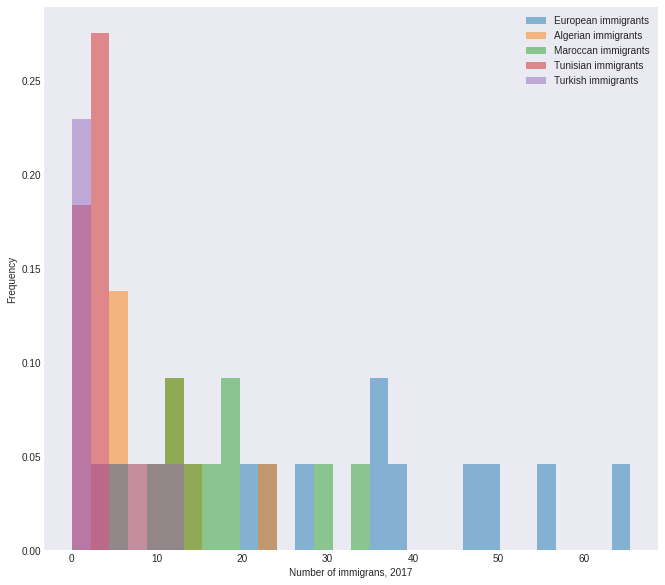

In [11]:

red_imm=df_imm_clean[['European immigrants', 'Algerian immigrants', 'Maroccan immigrants', 'Tunisian immigrants', 'Turkish immigrants']]
sns.despine(left=True, bottom=True)
fig=red_imm[::10].plot.hist(alpha=0.5,figsize=(11,10), bins=30, density=True)
plt.xlabel("Number of immigrans, 2017")

 # Exams (Bac)

In [12]:
"""BACCALAUREATE results in 2019"""
df_bacc_clean=df_bacc[4:106]
df_bacc_clean=df_bacc_clean.drop([100, 101])  #dropping the province and metro
df_bacc_clean.reset_index(drop=True, inplace=True)
df_bacc_clean.columns=['Dep_number', 'Dep_name', 'General_n', 'General_success','Tecnical_n', 'Tecnical_success',
                 'Professional_n', 'Professional_success', 'Total_n', 'Total_success']
print(len(df_bacc_clean))



df_bacc_simplified = df_bacc_clean[["Dep_number", "Dep_name", "General_success"]]
print(df_bacc_simplified["General_success"].mean())
df_bacc_simplified["General_success_centered"] = df_bacc_simplified["General_success"] - df_bacc_simplified["General_success"].mean()
df_bacc_simplified.tail(10)
df_bacc_simplified.to_csv("bac.csv",index=False)

100
91.31999999999998


ValueError: Could not interpret input 'Total_success'

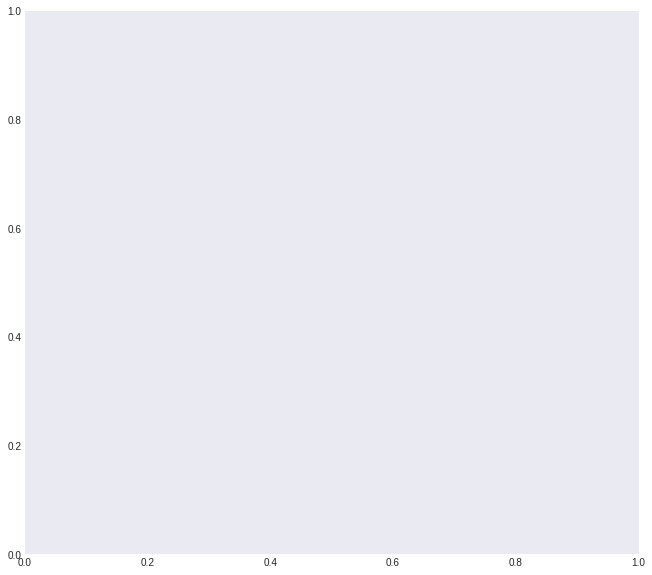

In [13]:
fig, ax = plt.subplots(figsize=(11,10))
sns.despine(left=True, bottom=True)
sns.scatterplot(data=df_bacc[::5],x="Total_success", y="Dep_name" , color='green', label='Total', s=100)

sns.scatterplot(data=df_bacc[::5],x="Professional_success", y="Dep_name", color='b' , label='Professional', s=100)
sns.scatterplot(data=df_bacc[::5],x="Tecnical_success", y="Dep_name", color='deepskyblue', label='Tecnical' , s=100)
sns.scatterplot(data=df_bacc[::5],x="General_success", y="Dep_name", color='turquoise', label='General' , s=100)
plt.xlabel("Exam success rate, 2019")
plt.ylabel("Departement")

 # Crime

In [ ]:
"""Importing France crime dataset, per month from 1996 to 2021. This is the most 
complicated and complete dataset to work with"""

df=pd.read_excel('crime.xlsx', sheet_name=None)
tot=(df['France_Entière'])
metro=(df['France_Métro'])

In [ ]:
crime_reason=list(tot['libellé index'])

In [ ]:
# We drop the first two months of 2021 as they are not a full year
tot=tot.drop(columns=['Index', 'libellé index', '_2021_02', '_2021_01'])
metro=metro.drop(columns=['Index', 'libellé index', '_2021_02', '_2021_01'])

In [ ]:
"""The departments 1-95, 971-978, 986-988 data"""
dep=[]
for key, value in df.items():
    dep.append(key)
dep=dep[2:]  # because the first two are total and metro
print(dep)

In [ ]:
"""reversing to have 2000 first, to 2021"""
tot=tot.iloc[:,::-1]
metro=metro.iloc[:,::-1]
print(tot,metro)

In [ ]:
"""Summing every 12 elements in each row to get avg per year"""
tot_sum_row = tot.groupby([[i//12 for i in range(0,len(tot.columns))]], axis = 1).sum()
metro_sum_row = metro.groupby([[i//12 for i in range(0,len(metro.columns))]], axis = 1).sum()

In [ ]:
"""Example of crime"""

year=list(range(1996, 2021))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

for i in range(3, len(crime_reason), 30):
    ax[0].plot(year[4:len(year)], tot_sum_row.iloc[i], label=crime_reason[i])
for i in range(3, len(crime_reason), 30):
    ax[1].plot(year[0:len(year)], metro_sum_row.iloc[i])
    
ax[0].set_title("CRIME IN FRANCE")
ax[1].set_title("CRIME ON FRANCE METRO")
ax[0].set_ylabel("Crime count")
ax[0].set_xlabel("Year")
ax[1].set_xlabel("Year")
ax[0].set_xlim(2000,2020)
ax[1].set_xlim(2000,2020)
fig.tight_layout()
ax[0].legend(loc='best',bbox_to_anchor=(0, 0, 1.7, -0.1), fontsize=10)    
plt.show()
plt.close()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

for i in range(0, len(crime_reason), 30):
    ax[0].barh(year[4:len(year)], tot_sum_row.iloc[i])
for i in range(0, len(crime_reason), 30):
    ax[1].barh(year[4:len(year)], metro_sum_row.iloc[i][4:], label='_nolegend_')
    
ax[0].set_title("CRIME IN FRANCE")
ax[1].set_title("CRIME ON FRANCE METRO")
ax[0].set_xlabel("Crime count")
ax[0].set_ylabel("Year")
ax[1].set_xlabel("Crime count")
# ax[0].set_xlim(2000,2020)
# ax[1].set_xlim(1996,2020)
fig.tight_layout()
ax[0].legend(loc='best',bbox_to_anchor=(0, 0, 1.7, -0.1), fontsize=10)    
plt.show()
plt.close()

In [ ]:
tot_sum_col=tot.sum(axis = 0, skipna = True)
metro_sum_col=metro.sum(axis = 0, skipna = True)

In [ ]:
tot_sum_col

In [ ]:
len(tot_sum_col), len(metro_sum_col)

In [ ]:
"""grouping months to have only year
n is the number of columns you want to group together
m is the total number of columns being grouped"""
tot_sum_col = tot_sum_col.groupby([[i//12 for i in range(0,len(tot_sum_col))]], axis = 0).sum()
metro_sum_col = metro_sum_col.groupby([[i//12 for i in range(0,len(metro_sum_col))]], axis = 0).sum()

In [ ]:
plt.figure(figsize=(7,6))
plt.plot(year[4:len(year)], tot_sum_col, label="Entire France")
plt.plot(year[0:len(year)], metro_sum_col, label="Metro")
plt.ylabel("Crime count")
plt.xlabel("Year")
plt.xlim(1996, 2020)
plt.legend()
plt.title("CRIME IN FRANCE", size=25)
plt.show()
plt.close()

In [ ]:
"""Making a copy of the whole df dictionary so not to edit original one"""
dep_crime_list=[]
dep_df = copy.deepcopy(df)
for i in range(len(dep)):
    dep_df[dep[i]]=dep_df[dep[i]].drop(columns=['Index', 'libellé index', '_2021_02', '_2021_01'])
    dep_df[dep[i]]=dep_df[dep[i]].iloc[:, ::-1]
    dep_sum_col = dep_df[dep[i]].sum(axis = 0, skipna = True)
    dep_sum_col = dep_sum_col.groupby([[i//12 for i in range(0,len(dep_sum_col))]], axis = 0).sum()
    dep_crime_list.append(dep_sum_col)
    

In [ ]:
crime_per_departement = [dep_crime_list[i][17] for i in range(len(dep[:-11]))] 
len(crime_per_departement)

crime_df = pd.DataFrame({'Dep_number':dep[:-11], 'crime':crime_per_departement})

crime_df.to_csv("crime.csv", index=False)

In [ ]:
"""Creating map with color intensity for cases of crime
change year range to get appropriate maps"""

import pygal 
from pygal.maps import fr

for l in range(0, len(year), 10):
    fr_chart = pygal.maps.fr.Departments(human_readable=True)
#     fr_chart.title = 'Year '+str(year[l])
    
#         print(dep_crime_list[i][l], dep[i], year[l])
    fr_chart.add('In '+ str(year[l])+'', {
                 str(dep[i]): dep_crime_list[i][l] for i in range(len(dep[:-11]))})

    fr_chart.render()
    # fr_chart.render_to_file('france.svg')
    fr_chart.render_to_png('france_crime'+str(year[l])+'.png')

In [ ]:
len(year)